# **Import the Necessary Libraries**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Load the Dataset**

In [13]:
df = pd.read_csv(r'D:\RATHNA\FITA ACADEMY\Kaggle\Life_Expectancy_Data.csv')

In [14]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [16]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [17]:
 df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [18]:
df = df.dropna(subset=['Life expectancy '])
df.shape

(2928, 22)

In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=[object]).columns.tolist()

In [20]:
num_cols 

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [21]:
cat_cols

['Country', 'Status']

In [22]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [23]:

df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Year                 0
Life expectancy      0
Adult Mortality      0
infant deaths        0
Alcohol              0
                    ..
Country_Viet Nam     0
Country_Yemen        0
Country_Zambia       0
Country_Zimbabwe     0
Status_Developing    0
Length: 203, dtype: int64

# **Features and target variable**

In [25]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

# **Split the data into training and testing sets**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Scale the data

StandardScaler = StandardScaler()
StandardScaler.fit(X)
X_scaled = StandardScaler.transform(X)

# **1.Linear Regression Model**

In [30]:
linear_model = LinearRegression()

In [31]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred_linear = linear_model.predict(X_test)

In [33]:

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))
print("Coefficients:", linear_model.coef_)
print("\n")

Linear Regression:
Mean Squared Error: 3.868724177470059
R2 Score: 0.955274555967012
Coefficients: [ 2.73551726e-01 -1.93748831e-03  1.04147817e-01 -3.29132313e-02
  1.61773021e-04 -4.38931452e-03 -1.01799283e-05 -4.19589793e-03
 -7.45610652e-02  5.15350432e-03 -5.53580060e-02  4.35360053e-03
 -3.37313940e-01 -1.92101373e-05 -1.84534019e-09  1.15082371e-02
  2.50566079e-02 -2.35735523e-01  1.18718137e-01  1.66214784e+01
  1.45388514e+01 -6.77878291e+00  1.71485657e+01  1.62800378e+01
  1.48910871e+01  2.54371690e+00  2.71478248e+00  1.20929455e+01
  1.61900030e+01  1.68098589e+01  9.47086330e+00  1.59458599e+01
  1.18084214e+01  2.07641879e+00  1.11062859e+01  3.10505399e-01
  7.11629477e+00  9.63043704e+00  1.76527880e+01  3.51853807e+00
  1.36870450e+01  1.74984903e+01 -5.34737618e+00 -1.07452690e-01
 -8.92779271e-01  1.37530845e+01  6.29179690e+00 -1.17139305e+00
  2.29324419e+01 -5.78743956e+00 -4.52018220e+00  2.05962968e+01
  1.15504806e+01  1.47885913e+01  3.63343973e+00  2.4902

# **2. L1 Regularization (Lasso)**

In [35]:

lasso_model = Lasso(alpha=0.1)  # alpha is the regularization parameter

In [36]:
lasso_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e+04, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [37]:
y_pred_lasso = lasso_model.predict(X_test)

In [38]:
print("Lasso (L1 Regularization):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("Coefficients:", lasso_model.coef_)
print("\n")

Lasso (L1 Regularization):
Mean Squared Error: 16.256020861675207
R2 Score: 0.8120678244569515
Coefficients: [ 8.75316101e-03 -2.16629983e-02  1.03161478e-01  1.23886984e-01
  1.02868152e-04 -1.47650530e-02 -3.15314940e-05  4.63264607e-02
 -7.58969725e-02  3.09207941e-02  2.65735318e-02  4.15958021e-02
 -4.77335422e-01  4.95130798e-05 -1.08430909e-09 -1.02354139e-01
 -0.00000000e+00  0.00000000e+00  8.70927094e-01  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+

# **3. L2 Regularization (Ridge)**

In [40]:

ridge_model = Ridge(alpha=0.01)  # alpha is the regularization parameter

In [41]:
ridge_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.80595e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.01)

In [42]:
y_pred_ridge = ridge_model.predict(X_test)

In [43]:
print("Ridge (L2 Regularization):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("Coefficients:", ridge_model.coef_)


Ridge (L2 Regularization):
Mean Squared Error: 3.861091615856452
R2 Score: 0.955362794283216
Coefficients: [ 2.66897210e-01 -2.06885342e-03  9.98401065e-02 -2.41514431e-02
  1.55160504e-04 -4.33638571e-03 -1.00431249e-05 -3.28188901e-03
 -7.18797577e-02  5.92665195e-03 -6.12744621e-02  4.70057212e-03
 -3.35811035e-01 -1.76249746e-05 -1.81836484e-09 -7.27143920e-03
  1.34847832e-02 -1.72203865e-01  1.43988742e-01  1.50073503e+01
  1.31174910e+01 -8.00215730e+00  1.57061514e+01  1.45297210e+01
  1.33235058e+01  2.34755994e+00  2.64882875e+00  1.06214939e+01
  1.45664128e+01  1.52756474e+01  8.53469501e+00  1.43166995e+01
  1.01120835e+01  1.96223306e+00  9.54623311e+00 -8.71371877e-01
  6.18327264e+00  8.01786160e+00  1.61427562e+01  2.14468593e+00
  1.21522893e+01  1.59794663e+01 -5.32303645e+00 -1.26654506e+00
 -2.05950443e+00  1.23821748e+01  5.15587642e+00 -2.44186679e+00
  2.11562744e+01 -6.88873997e+00 -5.67722043e+00  1.88858122e+01
  1.04129255e+01  1.32466886e+01  2.41205618e+00

# **Decision Tree Regressor**

In [45]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
dt_regressor = DecisionTreeRegressor(max_depth= 6,random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [48]:
# Make predictions
y_pred_dt = dt_regressor.predict(X_test)

In [49]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [50]:
# Display the results
print("\nDecision Tree Regressor Results:")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")


Decision Tree Regressor Results:
Mean Squared Error: 6.82
R² Score: 0.92


max_depth= 2 
Decision Tree Regressor Results:
Mean Squared Error: 22.55
R² Score: 0.74

max_depth= 4
Decision Tree Regressor Results:
Mean Squared Error: 11.43
R² Score: 0.87

In [52]:
dt_regressor = DecisionTreeRegressor(max_depth= 4,random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

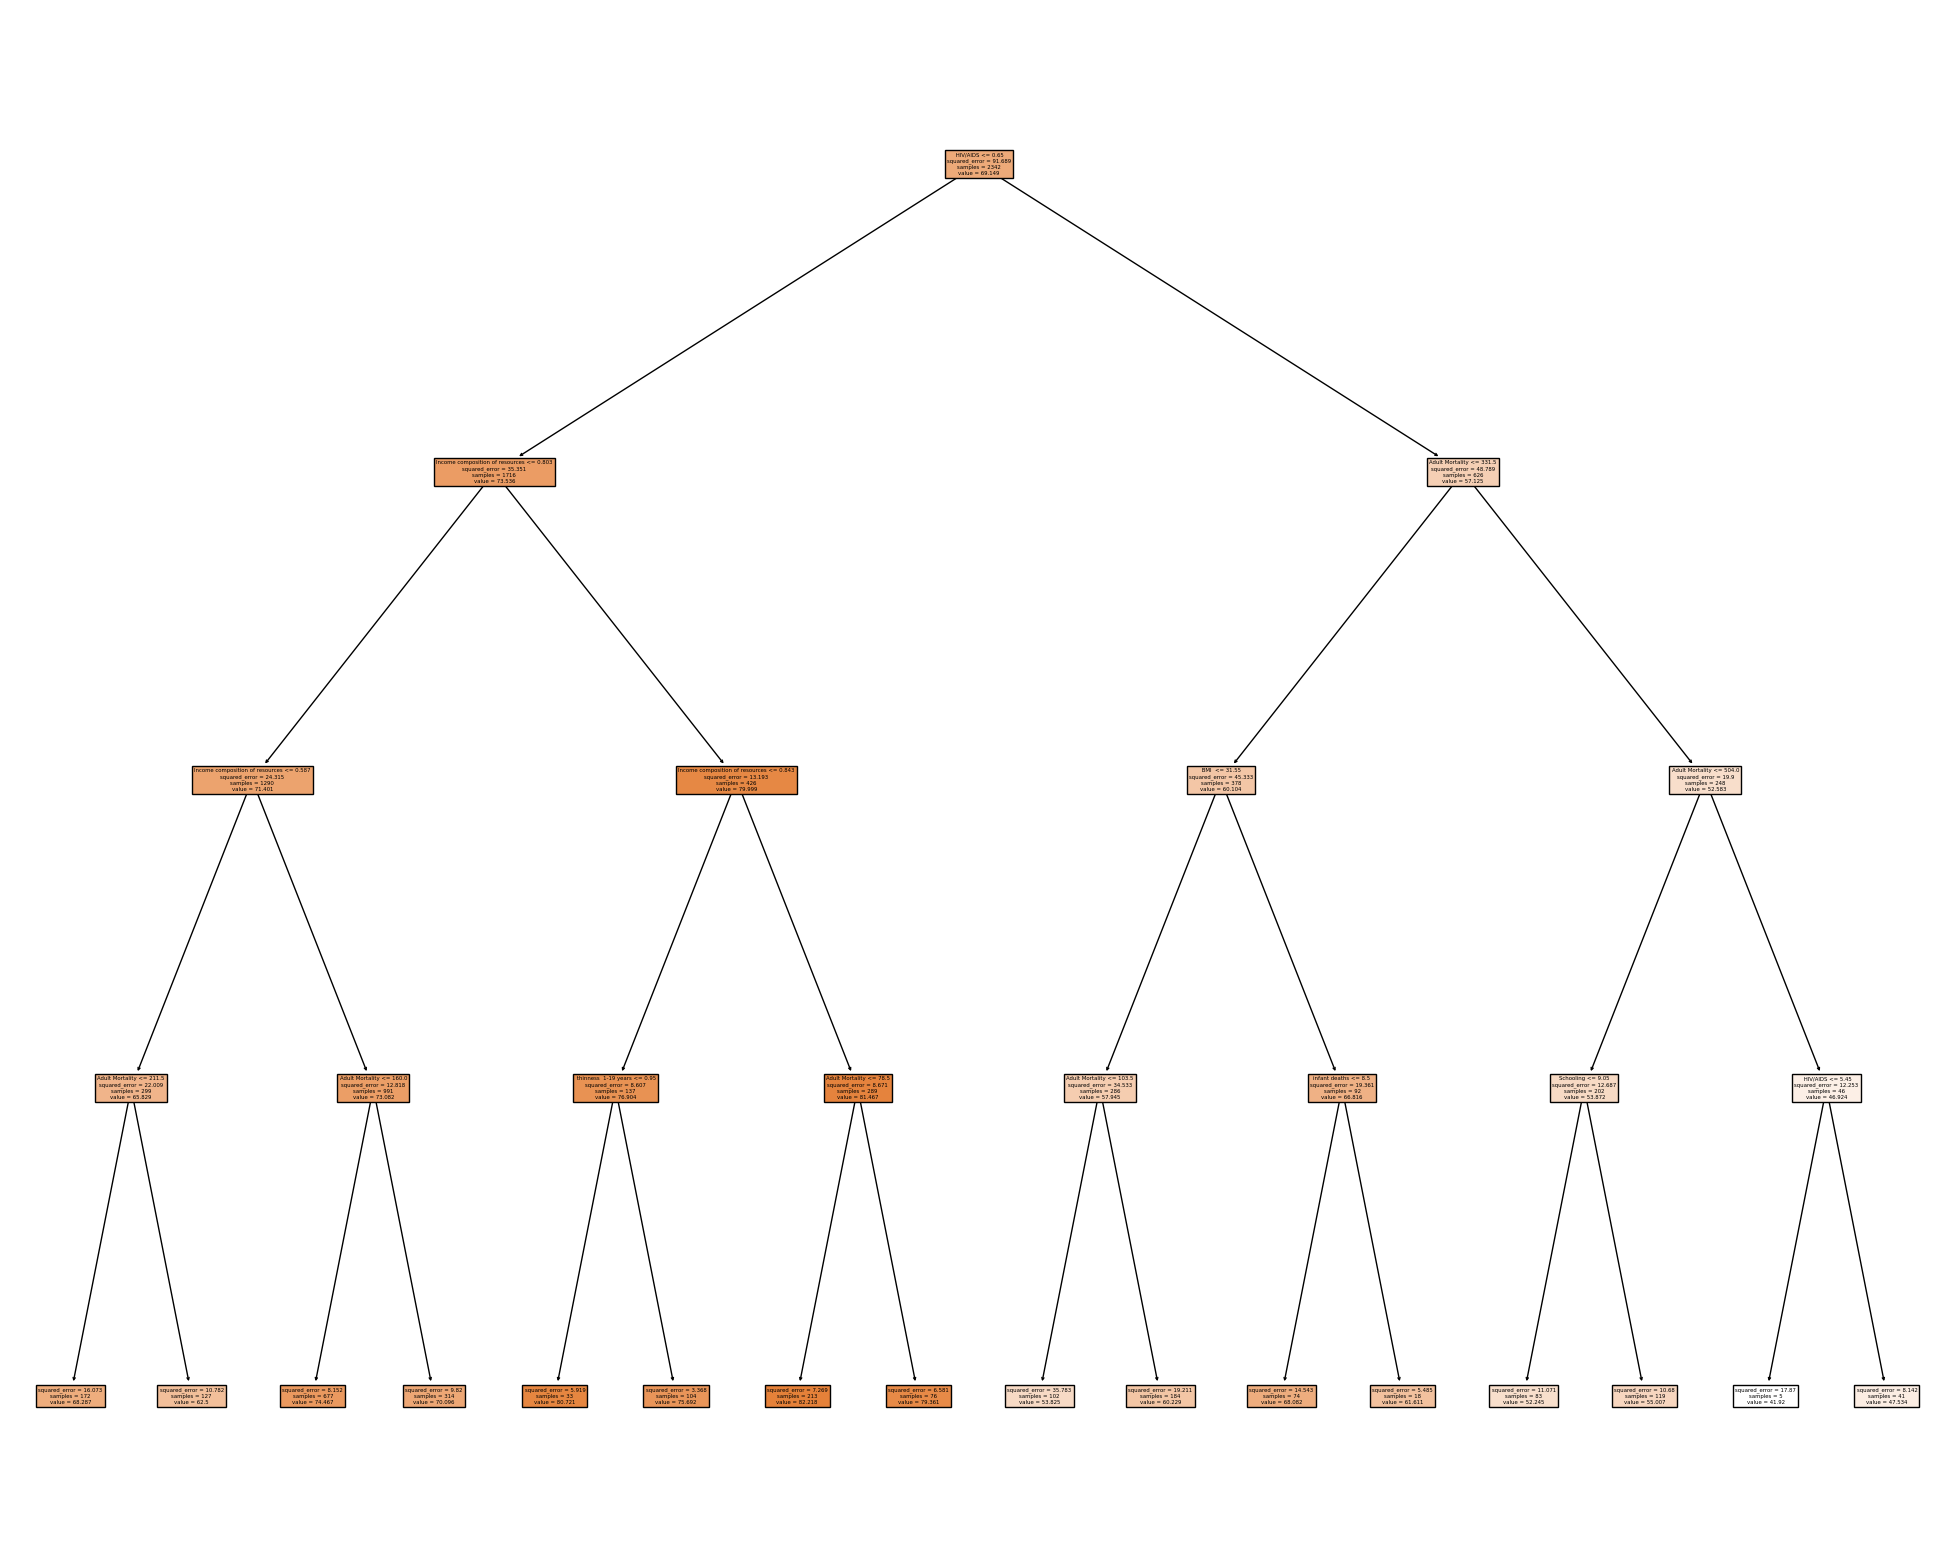

In [53]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_regressor,
                   feature_names=X.columns,
                   filled=True)

# **Random Forest regressor**

In [55]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
# Predict and evaluate
y_pred = rf_regressor.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.74
R-squared: 0.97


In [60]:
import xgboost as xgb
import lightgbm as lgb

In [61]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **XGBoost Model**

In [64]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=100)

In [65]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred_xgb = xgb_model.predict(X_test)

In [67]:
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R2 square:", np.sqrt(r2_score(y_test, y_pred_xgb)))

XGBoost RMSE: 1.7514074522192633
XGBoost R2 square: 0.9821090361370843


# **LightGBM**

In [69]:
lgb_model = lgb.LGBMRegressor(objective='regression', learning_rate=0.1, max_depth=5, n_estimators=100,force_col_wise=True)

In [70]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 2342, number of used features: 20
[LightGBM] [Info] Start training from score 69.149018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMRegressor(force_col_wise=True, max_depth=5, objective='regression')

In [71]:
y_pred_lgb = lgb_model.predict(X_test)

In [72]:
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
print("LightGBM R2:", np.sqrt(r2_score(y_test, y_pred_lgb)))

LightGBM RMSE: 1.7818845566996404
LightGBM R2: 0.9814750341366382


# **Hyperparameter Tuning**

# **DecisionTree Model**

In [75]:
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
param_grid = {
    'criterion': ['squared_error', 'absolute_error'], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [76]:
# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: -6.539204278515847
